In [1]:
#Emre Duzakin

import pandas as pd
import matplotlib.pyplot as plt
salaries_df = pd.DataFrame(pd.read_excel("Merge_Data_DSGP311.xlsx"))

#Lets see what kind of information this dataframe holds:

salaries_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115963 entries, 0 to 115962
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_STATUS                     115963 non-null  object        
 1   CASE_RECEIVED_DATE              115963 non-null  datetime64[ns]
 2   DECISION_DATE                   115963 non-null  datetime64[ns]
 3   EMPLOYER_NAME                   115963 non-null  object        
 4   PREVAILING_WAGE_SUBMITTED       115963 non-null  float64       
 5   PREVAILING_WAGE_SUBMITTED_UNIT  115963 non-null  object        
 6   PAID_WAGE_SUBMITTED             115963 non-null  float64       
 7   PAID_WAGE_SUBMITTED_UNIT        115963 non-null  object        
 8   JOB_TITLE                       115963 non-null  object        
 9   WORK_CITY                       115963 non-null  object        
 10  PREVAILING_WAGE_SOC_TITLE       115963 non-null  object 

In [2]:
#As we can see, we have a "JOB_TITLE_SUBGROUP" category that we can use to determine if the jobs are related to data.

salaries_df["JOB_TITLE_SUBGROUP"].value_counts()

software engineer    87452
business analyst     23888
data analyst          3468
data scientist        1155
Name: JOB_TITLE_SUBGROUP, dtype: int64

In [3]:
#Indeed, we have two categories called "data analyst" and "data scientist" that we can use.
#Lets create a seperate dataframe so that we can work on those data jobs easily.

data_salaries_df = salaries_df.loc[salaries_df['JOB_TITLE_SUBGROUP'].isin(["data analyst", "data scientist"])]

#Lets also drop rows that have missing state or paid_wage information, since we can't use them on our calculations

data_salaries_df = data_salaries_df.dropna(subset=['WORK_STATE', 'PAID_WAGE_PER_YEAR'])

#We actually don't need to have this here since there are no NaN values associates with these parameters, but it is
#Nice to keep this part just incase if we want to use this code with different data with same structure in the future

In [4]:
#Lets group the salary information by taking average yearly paid wage into account and sort them in descending order

sorted_sal_df = data_salaries_df.groupby('WORK_STATE').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_sal_df = sorted_sal_df.reset_index() #We need to do this to create a plot later
sorted_sal_df

,WORK_STATE,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,ANNUAL_MEAN_WAGE_ALL_FIELDS,MEDIAN_MONTHLY_RENT,VALUE_OF_DOLLAR,CPI (2018)
0,California,87144.052833,99035.245233,87144.052833,99035.245233,65740.0,2518.0,0.87,257.562
1,Washington,84107.161765,98497.852794,84107.161765,98497.852794,66870.0,1838.0,0.93,257.562
2,Utah,60715.230769,84322.692308,60715.230769,84322.692308,51430.0,1526.0,1.04,257.562
3,Connecticut,65791.348485,81527.429697,65791.348485,81527.429697,65450.0,1803.0,0.94,257.562
4,Oregon,63153.875000,81342.375000,63153.875000,81342.375000,56880.0,1707.0,0.99,257.562
5,New York,68235.163341,81139.744042,68235.163341,81139.744042,67850.0,2050.0,0.86,257.562
6,Massachusetts,68063.146667,79730.876044,68063.146667,79730.876044,70010.0,2252.0,0.91,257.562
7,Arizona,65816.944444,78567.460000,65816.944444,78567.460000,53400.0,1356.0,1.04,257.562
8,New Hampshire,73413.500000,75943.250000,73413.500000,75943.250000,56730.0,1748.0,0.94,257.562
9,Georgia,63223.420270,72401.928784,63223.420270,72401.928784,51940.0,1262.0,1.08,257.562


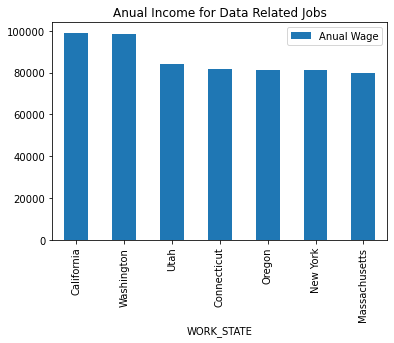

In [5]:
#As expected, California pays the most when it comes to data related jobs. However, it is surprizing to note that
#Utah is also close to the top, could this be related to massive NSA data center located around Bluffdale? Probably.

#Lets use this information to create a plot so that we can visualy see the difference
#I will use the top 7 states to make the plot comprehensible, this can be changes by changing the variable below

state_count = 7
sorted_sal_df.head(state_count).plot(x ='WORK_STATE', y='PAID_WAGE_PER_YEAR', kind = 'bar', label="Anual Wage",
                                     title='Anual Income for Data Related Jobs')
plt.show()

## Differences Between Job Sub-Categories

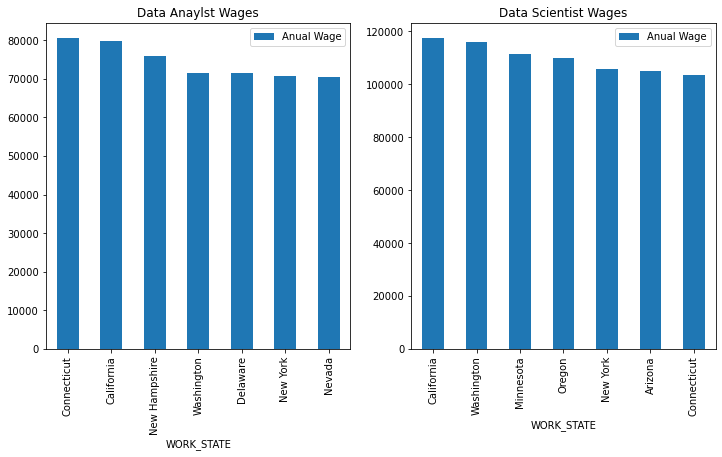

In [6]:
#Now, lets explore the differences between different job subtypes, namely "data analyst" and "data scientist"
#Lets create two different dataframes for the each sub-category

analyst_salaries_df = salaries_df.loc[salaries_df['JOB_TITLE_SUBGROUP'].isin(["data analyst"])]
scientist_salaries_df = salaries_df.loc[salaries_df['JOB_TITLE_SUBGROUP'].isin(["data scientist"])]

#Lets do the row dropping once again:
analyst_salaries_df = analyst_salaries_df.dropna(subset=['WORK_STATE', 'PAID_WAGE_PER_YEAR'])
scientist_salaries_df = scientist_salaries_df.dropna(subset=['WORK_STATE', 'PAID_WAGE_PER_YEAR'])

#Now, lets sort the data frames by taking anual paid wage into account for each state
sorted_analyst_df = analyst_salaries_df.groupby('WORK_STATE').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_analyst_df = sorted_analyst_df.reset_index() #We need to do this to create a plot later

sorted_scientist_df = scientist_salaries_df.groupby('WORK_STATE').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_scientist_df = sorted_scientist_df.reset_index() #We need to do this to create a plot later

#We can finally plot them side by side
figure, axis = plt.subplots(1, 2, figsize=(12,6))

#For data analyst
sorted_analyst_df.head(state_count).plot(x ='WORK_STATE', y='PAID_WAGE_PER_YEAR', kind = 'bar',label="Anual Wage"
                                     , ax = axis[0],subplots=True)
axis[0].set_title("Data Anaylst Wages")
  
# For data scientist
sorted_scientist_df.head(state_count).plot(x ='WORK_STATE', y='PAID_WAGE_PER_YEAR', kind = 'bar',label="Anual Wage"
                                     , ax = axis[1],subplots=True)
axis[1].set_title("Data Scientist Wages")

plt.show()

#As we can see from the plots below, Data Scientists earn more than Data Analysts
#Also, states that pay most do differ between data analysts and data scientists sub categories



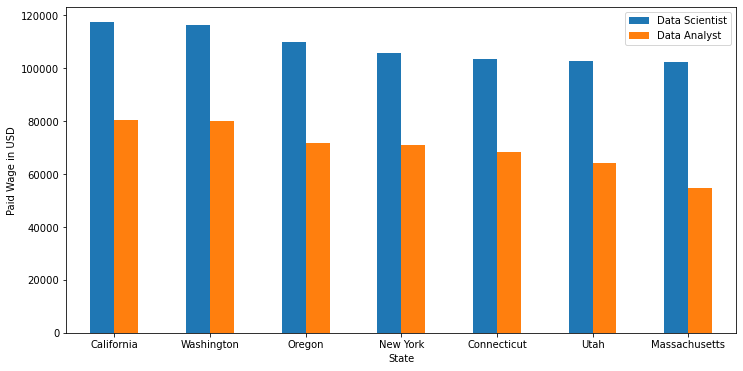

In [7]:
#Lets now have a combined plot of Data Analyst and Data Scientist to better see the wage differences between them in each state. 
#For this plot, I will use the highest paying states for all data related jobs.

pop_state_analyst_df = sorted_analyst_df.loc[sorted_analyst_df['WORK_STATE'].isin(["California", "Washington", "Utah", "Connecticut", "Oregon", "New York", "Massachusetts"])].reset_index()
pop_state_scientist_df = sorted_scientist_df.loc[sorted_scientist_df['WORK_STATE'].isin(["California", "Washington", "Utah", "Connecticut", "Oregon", "New York", "Massachusetts"])].reset_index()

df_to_plot = pd.DataFrame({'Data Scientist': pop_state_scientist_df["PAID_WAGE_PER_YEAR"].tolist(),
    'Data Analyst': pop_state_analyst_df["PAID_WAGE_PER_YEAR"].tolist()}, index=pop_state_scientist_df["WORK_STATE"].tolist())
ax = df_to_plot.plot.bar(rot=0, figsize=(12,6), xlabel="State", ylabel="Paid Wage in USD")

#We can clearly see that Data Scientists are getting paid more than Data Analysts. 


## Companies With Highest Salaries for Each Sub-Categories 

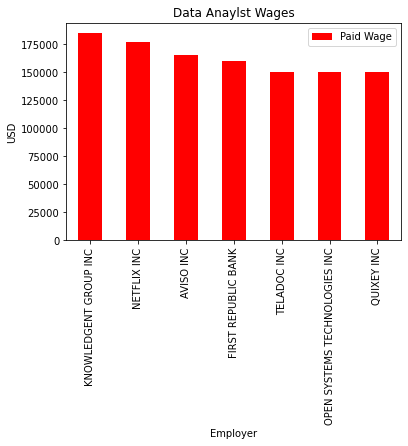

In [8]:
#Now, lets see which companies pays the most for these sub-categories 

#Lets drop rows that has no EMPLOYER_NAME just in case
analyst_salaries_df = analyst_salaries_df.dropna(subset=['EMPLOYER_NAME'])
scientist_salaries_df = scientist_salaries_df.dropna(subset=['EMPLOYER_NAME'])

#Now, lets sort the data frames by taking anual paid wage into account for each employer
sorted_analyst_df_em = analyst_salaries_df.groupby('EMPLOYER_NAME').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_analyst_df_em = sorted_analyst_df_em.reset_index() #We need to do this to create a plot later

sorted_scientist_df_em = scientist_salaries_df.groupby('EMPLOYER_NAME').mean().sort_values(by="PAID_WAGE_PER_YEAR", ascending=[False])
sorted_scientist_df_em = sorted_scientist_df_em.reset_index() #We need to do this to create a plot later

#Lets plot thhese side by side, just like we did previously
#It is important to note that we can use the dataframes we used in previous step, I am creating new ones for clarity



#For data analyst
sorted_analyst_df_em.head(state_count).plot(x ='EMPLOYER_NAME', y='PAID_WAGE_PER_YEAR', xlabel="Employer", ylabel="USD", label="Paid Wage", kind = 'bar', color="r").set_title("Data Anaylst Wages")
plt.show()
  


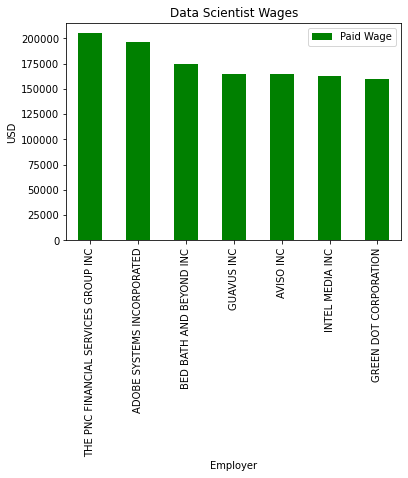

In [9]:
# For data scientist
sorted_scientist_df_em.head(state_count).plot(x ='EMPLOYER_NAME', y='PAID_WAGE_PER_YEAR', xlabel="Employer", ylabel="USD", label="Paid Wage", kind = 'bar', color="g").set_title("Data Scientist Wages")


plt.show()

#There is almost no overlap between top paying companies for Data Anaylst and Data Scientist. 
#The reason behind this could be each company specilising in a specific field, requiring specific set of skills
#for their positions.


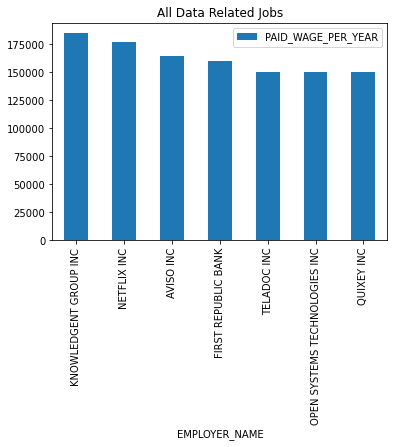

In [10]:
#Lastly, lets create a plot where we see the top paying companies for all data related jobs for perspective.
all_data_sorted_em = data_salaries_df.groupby('EMPLOYER_NAME').mean().sort_values(by="PAID_WAGE_PER_YEAR"
                                                                                  , ascending=[False])
sorted_analyst_df_em.head(state_count).plot(x ='EMPLOYER_NAME', y='PAID_WAGE_PER_YEAR'
                                            , kind = 'bar').set_title("All Data Related Jobs")
plt.show()

## Taking Standart of Living Into Account

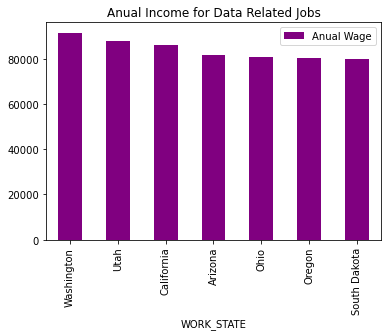

In [11]:
#The plot below shows anual income for data related jobs when taking standart of living into account.
#For this plot, standart of living is calculated by anual income multiplied by dollar value for each state.

sorted_sal_df["Living_Standart_Income"] = sorted_sal_df["PAID_WAGE_PER_YEAR"] * sorted_sal_df["VALUE_OF_DOLLAR"] 
sorted_sal_df_plot = sorted_sal_df.groupby('WORK_STATE').mean().sort_values(by="Living_Standart_Income", ascending=[False]).reset_index()

sorted_sal_df_plot.head(state_count).plot(x ='WORK_STATE', y='Living_Standart_Income', kind = 'bar', label="Anual Wage",
                                     title='Anual Income for Data Related Jobs', color="purple")
plt.show()




